## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [12]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [14]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [15]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [16]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [17]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [19]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 57s 29s/step - loss: 4.3071 - accuracy: 0.3750 - val_loss: 11.2099 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 36s 26s/step - loss: 12.1360 - accuracy: 0.3906 - val_loss: 4.7790 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 40s 29s/step - loss: 6.6687 - accuracy: 0.3281 - val_loss: 1.1765 - val_accuracy: 0.3103
Epoch 4/50
2/2 [==============================] - 44s 33s/step - loss: 2.5116 - accuracy: 0.4375 - val_loss: 6.9421 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 36s 25s/step - loss: 3.8672 - accuracy: 0.5156 - val_loss: 6.3391 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 46s 30s/step - loss: 3.6453 - accuracy: 0.3906 - val_loss: 1.3081 - val_accuracy: 0.3103
Epoch 7/50
2/2 [==============================] - 41s 30s/step - loss: 1.3893 - accuracy: 0.5000 - val_loss: 3.0090 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=========

In [25]:
r.history

{'loss': [4.307068347930908,
  12.135965347290039,
  6.668655872344971,
  2.511626958847046,
  3.8671815395355225,
  3.645271062850952,
  1.3892590999603271,
  2.7160067558288574,
  1.7290185689926147,
  1.0770552158355713,
  1.0679738521575928,
  0.9154062271118164,
  0.93230801820755,
  0.8621855974197388,
  0.7702332139015198,
  0.6918801665306091,
  0.6484834551811218,
  0.7186970114707947,
  0.5825121402740479,
  0.6596542000770569,
  0.5468798279762268,
  0.6836221218109131,
  0.4463284909725189,
  0.450939416885376,
  0.35707321763038635,
  0.363079696893692,
  0.4459648132324219,
  0.44978493452072144,
  0.2851768136024475,
  0.397243857383728,
  0.3312862813472748,
  0.406059592962265,
  0.30324751138687134,
  0.3890431821346283,
  0.25123530626296997,
  0.3701722323894501,
  0.26434314250946045,
  0.26887190341949463,
  0.2736499309539795,
  0.2845129370689392,
  0.24695231020450592,
  0.30468514561653137,
  0.24992483854293823,
  0.2764916718006134,
  0.24217209219932556,
  

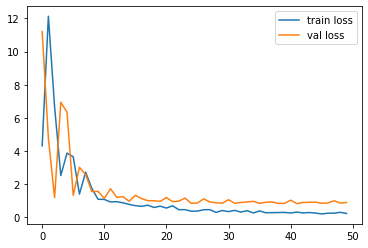

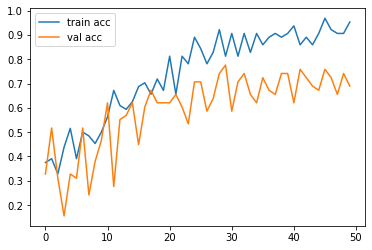

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[2.52978953e-05, 1.85936538e-03, 9.98115301e-01],
       [1.30243478e-02, 5.78682423e-01, 4.08293217e-01],
       [1.07175291e-01, 3.33298236e-01, 5.59526443e-01],
       [5.15766591e-02, 9.04619515e-01, 4.38038632e-02],
       [5.63609507e-03, 9.85371649e-01, 8.99217278e-03],
       [3.29370618e-01, 5.27465641e-01, 1.43163741e-01],
       [1.08871073e-01, 4.71582621e-01, 4.19546276e-01],
       [8.59158337e-01, 1.01803057e-01, 3.90385389e-02],
       [1.10877506e-01, 1.76211717e-04, 8.88946235e-01],
       [2.15580291e-03, 9.76020813e-01, 2.18234155e-02],
       [1.38340089e-02, 2.45900042e-02, 9.61575985e-01],
       [4.33720686e-02, 2.04824354e-03, 9.54579711e-01],
       [1.24968901e-01, 1.79973745e-03, 8.73231351e-01],
       [1.57557696e-01, 8.18835020e-01, 2.36072671e-02],
       [6.20713755e-02, 6.29135370e-01, 3.08793187e-01],
       [6.80614173e-01, 4.94257882e-02, 2.69960016e-01],
       [8.65818739e-01, 6.65536523e-03, 1.27525955e-01],
       [3.40139478e-01, 4.60936

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2,
       1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [34]:
img_data

NameError: name 'img_data' is not defined

In [35]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [36]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [37]:
x.shape

(224, 224, 3)

In [38]:
x=x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

array([[0.01483196, 0.00508031, 0.9800877 ]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)

In [42]:
a==1

array([False])